Part 1 
Balancing the Dataset

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score

In [90]:
df = pd.read_csv("dataset.csv")

print(df.shape)
df.head()

(772, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,1
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [91]:
from sklearn.utils import resample

In [92]:
# Separate input features and target
y = df.Class
X = df.drop('Class', axis=1)

# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

In [93]:
# concatenate our training data back together
X = pd.concat([X_train, y_train], axis=1)
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
573,427,0.823788,-0.902938,0.107280,0.384451,-0.790005,-0.431549,0.114447,-0.124467,0.706185,...,-0.203972,-0.995558,-0.173509,-0.063200,0.180529,0.848548,-0.115666,0.041674,246.96,0
665,503,0.860545,-0.747804,-0.955151,-1.124056,0.186536,-0.385942,0.703443,-0.282689,0.482600,...,-0.236279,-1.185203,-0.329844,-1.027355,0.613308,-0.979857,-0.018398,0.046621,268.93,0
445,323,-0.704133,0.341397,1.740027,-1.661595,0.872313,-0.007311,0.923083,-0.575939,0.447697,...,-0.206984,-0.321045,-0.334626,-0.813176,-0.265089,0.689043,-0.904113,-0.579831,0.77,0
516,382,-0.804275,0.379523,1.892525,0.315886,-0.194783,-0.248984,0.422565,-0.028321,-0.247661,...,-0.152900,-0.213726,0.174706,0.486816,-0.365680,0.963301,-0.045545,0.110528,45.38,0
37,27,-1.452187,1.765124,0.611669,1.176825,-0.445980,0.246826,-0.257566,1.092472,-0.607524,...,0.082280,0.325782,-0.069107,0.020962,-0.044668,-0.243441,0.149180,0.120557,1.80,0


In [94]:
# separate minority and majority classes
not_fraud = X[X.Class==0]
fraud = X[X.Class==1]

# upsample minority
fraud_upsampled = resample(fraud,
                          replace=True, # sample with replacement
                          n_samples=len(not_fraud), # match number in majority class
                          random_state=27) # reproducible results

# combine majority and upsampled minority
new_df = pd.concat([not_fraud, fraud_upsampled])

# check new class counts
new_df.Class.value_counts()

0    573
1    573
Name: Class, dtype: int64

In [95]:
new_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
573,427,0.823788,-0.902938,0.107280,0.384451,-0.790005,-0.431549,0.114447,-0.124467,0.706185,...,-0.203972,-0.995558,-0.173509,-0.063200,0.180529,0.848548,-0.115666,0.041674,246.96,0
665,503,0.860545,-0.747804,-0.955151,-1.124056,0.186536,-0.385942,0.703443,-0.282689,0.482600,...,-0.236279,-1.185203,-0.329844,-1.027355,0.613308,-0.979857,-0.018398,0.046621,268.93,0
445,323,-0.704133,0.341397,1.740027,-1.661595,0.872313,-0.007311,0.923083,-0.575939,0.447697,...,-0.206984,-0.321045,-0.334626,-0.813176,-0.265089,0.689043,-0.904113,-0.579831,0.77,0
516,382,-0.804275,0.379523,1.892525,0.315886,-0.194783,-0.248984,0.422565,-0.028321,-0.247661,...,-0.152900,-0.213726,0.174706,0.486816,-0.365680,0.963301,-0.045545,0.110528,45.38,0
37,27,-1.452187,1.765124,0.611669,1.176825,-0.445980,0.246826,-0.257566,1.092472,-0.607524,...,0.082280,0.325782,-0.069107,0.020962,-0.044668,-0.243441,0.149180,0.120557,1.80,0


Distribution of the Classes in the subsample dataset
0    0.5
1    0.5
Name: Class, dtype: float64


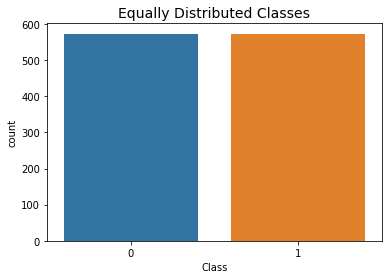

In [96]:
print('Distribution of the Classes in the subsample dataset')
print(new_df['Class'].value_counts()/len(new_df))

sns.countplot(x='Class', data=new_df)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

Part - 2 
Creating Samples

Simple Random Sampling

Caluculating the Sample Size

In [97]:
import math
z=1.96
p=0.5
e=0.05
n = ((z**2)*p*(1-p))/e**2
n

384.1599999999999

In [98]:
import math
import numpy as np
from scipy import stats
import pandas as pd
import seaborn as sns

def z_calc(p1, p2, n1, n2):
    p_star = (p1*n1 + p2*n2) / (n1 + n2)
    return (p2 - p1) / math.sqrt(p_star*(1 - p_star)*((1.0 / n1) + (1.0 / n2)))

In [99]:
# Initiate the power analysis
from statsmodels.stats.power import TTestIndPower
power_analysis = TTestIndPower()
# Calculate sample size
sample_size = power_analysis.solve_power(effect_size = 0.2, alpha = 0.05, power = 0.8, alternative = 'two-sided')
# Print results
print('The sample size needed for each group is', round(sample_size))

The sample size needed for each group is 393


c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_continuous_distns.py:6832: RuntimeWarning: invalid value encountered in _nct_sf
  return np.clip(_boost._nct_sf(x, df, nc), 0, 1)
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_continuous_distns.py:6826: RuntimeWarning: invalid value encountered in _nct_cdf
  return np.clip(_boost._nct_cdf(x, df, nc), 0, 1)


In [100]:
import pandas as pd
import numpy as np

np.random.seed(0)

sample_size = 393

sample1 = new_df.sample(n=sample_size, random_state=0)
print(sample1)


     Time        V1        V2        V3        V4        V5        V6  \
172   110 -0.591933  0.111273  0.699126 -1.536074  1.193208  0.648896   
623   472 -3.043541 -3.157307  1.088463  2.288644  1.359805 -1.064823   
639   484 -0.928088  0.398194  1.741131  0.182673  0.966387 -0.901004   
717   539 -1.738582  0.052740  1.187057 -0.656652  0.920623 -0.291788   
244   164  0.073497  0.551033  0.451890  0.114964  0.822947  0.251480   
..    ...       ...       ...       ...       ...       ...       ...   
203   135  1.207207  0.241318  0.258745  0.653335 -0.256426 -0.620309   
121    77 -0.427191  0.745708  1.761811 -0.165130  0.058298 -0.213413   
623   472 -3.043541 -3.157307  1.088463  2.288644  1.359805 -1.064823   
469   346  1.507578 -1.092820  0.360102 -1.770940 -0.913849  0.678723   
658   497 -0.417836  0.981103  1.135820 -0.172593  0.396675 -0.002842   

           V7        V8        V9  ...       V21       V22       V23  \
172  0.796706  0.016904  0.789664  ...  0.205964  1

Systematic Sampling

In [101]:
import pandas as pd
import math
# Calculate the number of rows in the dataset
n = len(new_df)

# Set the sampling interval "k" as the square root of the number of rows in the dataset
k = 3

# Select every "k" row starting from a random index in the dataset
sample2 = new_df.iloc[::k]

# Print the first few rows of the sample
print(sample2)

     Time        V1        V2        V3        V4        V5        V6  \
573   427  0.823788 -0.902938  0.107280  0.384451 -0.790005 -0.431549   
516   382 -0.804275  0.379523  1.892525  0.315886 -0.194783 -0.248984   
413   298  1.218417  0.077792  0.533944  0.843849 -0.536022 -0.702281   
315   227  1.120599 -0.313308  0.395309  0.596756 -0.420412  0.325862   
415   300  0.007043  1.239504  0.417050  0.530004  0.942324 -0.559968   
..    ...       ...       ...       ...       ...       ...       ...   
639   484 -0.928088  0.398194  1.741131  0.182673  0.966387 -0.901004   
623   472 -3.043541 -3.157307  1.088463  2.288644  1.359805 -1.064823   
623   472 -3.043541 -3.157307  1.088463  2.288644  1.359805 -1.064823   
699   529 -2.000567 -2.495484  2.467149  1.140053  2.462010  0.594262   
623   472 -3.043541 -3.157307  1.088463  2.288644  1.359805 -1.064823   

           V7        V8        V9  ...       V21       V22       V23  \
573  0.114447 -0.124467  0.706185  ... -0.203972 -0

Cluster Sampling

In [102]:
len(new_df)

1146

In [103]:
def get_clustered_Sample(df, n_per_cluster, num_select_clusters):
    N = len(df)
    K = int(N/n_per_cluster)
    data = None
    for k in range(K):
        sample_k = df.sample(n_per_cluster)
        sample_k["cluster"] = np.repeat(k,len(sample_k))
        df = df.drop(index = sample_k.index)
        data = pd.concat([data,sample_k],axis = 0)

    random_chosen_clusters = np.random.randint(0,K,size = num_select_clusters)
    samples = data[data.cluster.isin(random_chosen_clusters)]
    return(samples)

sample3 = get_clustered_Sample(df = new_df, n_per_cluster = 600, num_select_clusters = 2)
print(sample3)

     Time        V1        V2        V3        V4        V5        V6  \
172   110 -0.591933  0.111273  0.699126 -1.536074  1.193208  0.648896   
623   472 -3.043541 -3.157307  1.088463  2.288644  1.359805 -1.064823   
639   484 -0.928088  0.398194  1.741131  0.182673  0.966387 -0.901004   
717   539 -1.738582  0.052740  1.187057 -0.656652  0.920623 -0.291788   
244   164  0.073497  0.551033  0.451890  0.114964  0.822947  0.251480   
..    ...       ...       ...       ...       ...       ...       ...   
639   484 -0.928088  0.398194  1.741131  0.182673  0.966387 -0.901004   
367   268  1.146065  0.285853  0.562439  1.459336 -0.225891 -0.346303   
699   529 -2.000567 -2.495484  2.467149  1.140053  2.462010  0.594262   
497   366  1.020399 -0.639479  0.941568  0.121307 -0.996320  0.177803   
74     48 -1.793406  1.854604  0.979514  1.112262 -0.206403 -0.199546   

           V7        V8        V9  ...       V22       V23       V24  \
172  0.796706  0.016904  0.789664  ...  1.216195  0

Weighted Sampling

In [104]:
import pandas as pd

sample4 = new_df.sample(n=670, weights="Amount")
print(sample4)

     Time        V1        V2        V3        V4        V5        V6  \
51     36 -1.004929 -0.985978 -0.038039  3.710061 -6.631951  5.122103   
713   537 -1.097278  1.094348  2.074334 -0.085776 -0.200635 -0.424142   
623   472 -3.043541 -3.157307  1.088463  2.288644  1.359805 -1.064823   
623   472 -3.043541 -3.157307  1.088463  2.288644  1.359805 -1.064823   
623   472 -3.043541 -3.157307  1.088463  2.288644  1.359805 -1.064823   
..    ...       ...       ...       ...       ...       ...       ...   
123    78 -0.291241  1.515688  1.514355  2.518365  0.583648  0.425561   
6       4  1.229658  0.141004  0.045371  1.202613  0.191881  0.272708   
244   164  0.073497  0.551033  0.451890  0.114964  0.822947  0.251480   
22     18  1.166616  0.502120 -0.067300  2.261569  0.428804  0.089474   
639   484 -0.928088  0.398194  1.741131  0.182673  0.966387 -0.901004   

           V7        V8        V9  ...       V21       V22       V23  \
51   4.371691 -2.006868 -0.278736  ...  1.393406 -0

Stratified Sampling

In [105]:
from sklearn.model_selection import StratifiedShuffleSplit as ss

In [106]:
sp = ss(test_size=0.1)
def sample_stratified(dataframe, size, variable):
    sp = ss(test_size=size)
    for _, y in sp.split(dataframe, dataframe[variable]):
        dataframey = dataframe.iloc[y]
    return dataframey

In [107]:
sample5 = sample_stratified(new_df, 0.5, 'Class')
sample5

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
303,218,1.201989,-0.034452,0.696628,0.956746,-0.005827,1.095223,-0.574524,0.243435,0.788419,...,-0.109658,-0.011904,-0.166958,-1.295060,0.570793,-0.296854,0.094955,0.024008,12.99,0
285,204,-0.188424,0.877602,-0.734686,-0.913404,1.941770,4.037423,-1.707118,-2.537641,-0.590338,...,-0.824079,-1.042331,0.168265,0.963855,0.887850,0.171167,0.012284,0.164538,1.98,0
442,322,1.202007,0.108213,0.591724,0.566079,-0.641573,-0.816974,-0.127403,0.004375,-0.026148,...,-0.207683,-0.703844,0.165350,0.493736,0.114822,0.068947,-0.041350,0.008041,1.79,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,1
244,164,0.073497,0.551033,0.451890,0.114964,0.822947,0.251480,0.296319,0.139497,-0.123050,...,-0.128758,-0.381932,0.151012,-1.363967,-1.389079,0.075412,0.231750,0.230171,0.99,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,300,0.007043,1.239504,0.417050,0.530004,0.942324,-0.559968,1.502981,-0.751563,0.012713,...,-0.046722,0.720870,-0.141873,0.019747,-0.665861,-0.489940,0.157919,-0.332123,1.91,0
717,539,-1.738582,0.052740,1.187057,-0.656652,0.920623,-0.291788,0.269083,0.140631,0.023464,...,-0.179545,-0.192036,-0.261879,-0.237477,-0.335040,0.240323,-0.345129,-0.383563,1.00,1
717,539,-1.738582,0.052740,1.187057,-0.656652,0.920623,-0.291788,0.269083,0.140631,0.023464,...,-0.179545,-0.192036,-0.261879,-0.237477,-0.335040,0.240323,-0.345129,-0.383563,1.00,1
328,241,-1.142321,0.626405,2.526917,2.827973,0.619263,0.897473,0.536278,-0.060163,-0.813749,...,-0.309746,-0.269173,0.177396,-0.019578,0.048651,0.068831,-0.246503,-0.230837,10.62,0


Part - 3
Model training

In [108]:
X = sample1.drop('Class', axis=1)
y = sample1['Class']

In [109]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [110]:
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [111]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [112]:
classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "Naive Bayes": GaussianNB()
}

In [113]:
from sklearn.model_selection import cross_val_score

acc=[]
for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    acc.append(round(training_score.mean(), 2) * 100)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")
    
    

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

Classifiers:  LogisticRegression Has a training score of 92.0 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 94.0 % accuracy score
Classifiers:  SVC Has a training score of 76.0 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 97.0 % accuracy score
Classifiers:  GaussianNB Has a training score of 88.0 % accuracy score


In [114]:
acc

[92.0, 94.0, 76.0, 97.0, 88.0]

In [115]:
acc[1]

94.0

In [116]:
X = sample2.drop('Class', axis=1)
y = sample2['Class']

In [117]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [118]:
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [119]:
from sklearn.model_selection import cross_val_score

acc1=[]
for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    acc1.append(round(training_score.mean(), 2) * 100)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")
    
    

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

Classifiers:  LogisticRegression Has a training score of 95.0 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 94.0 % accuracy score
Classifiers:  SVC Has a training score of 76.0 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 98.0 % accuracy score
Classifiers:  GaussianNB Has a training score of 83.0 % accuracy score


In [120]:
X = sample3.drop('Class', axis=1)
y = sample3['Class']


In [121]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [122]:
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [123]:
from sklearn.model_selection import cross_val_score

acc2=[]
for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    acc2.append(round(training_score.mean(), 2) * 100)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")
    

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

Classifiers:  LogisticRegression Has a training score of 91.0 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 97.0 % accuracy score
Classifiers:  SVC Has a training score of 78.0 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 98.0 % accuracy score
Classifiers:  GaussianNB Has a training score of 88.0 % accuracy score


In [124]:
X = sample4.drop('Class', axis=1)
y = sample4['Class']

In [125]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [126]:
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values


In [127]:
from sklearn.model_selection import cross_val_score

acc3=[]
for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    acc3.append(round(training_score.mean(), 2) * 100)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")


c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

Classifiers:  LogisticRegression Has a training score of 90.0 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 97.0 % accuracy score
Classifiers:  SVC Has a training score of 82.0 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 99.0 % accuracy score
Classifiers:  GaussianNB Has a training score of 82.0 % accuracy score


In [128]:
X = sample5.drop('Class', axis=1)
y = sample5['Class']

In [129]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [130]:

X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [135]:
from sklearn.model_selection import cross_val_score

acc5=[]
for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    acc5.append(round(training_score.mean(), 2) * 100)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")
 

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

Classifiers:  LogisticRegression Has a training score of 93.0 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 96.0 % accuracy score
Classifiers:  SVC Has a training score of 77.0 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 98.0 % accuracy score
Classifiers:  GaussianNB Has a training score of 84.0 % accuracy score


In [136]:
acc5

[93.0, 96.0, 77.0, 98.0, 84.0]

In [139]:
from tabulate import tabulate
data = [["M1",acc[0],acc1[0],acc2[0],acc3[0],acc5[0]], ["M2",acc[1],acc1[1],acc2[1],acc3[1],acc5[1]], ["M3",acc[2],acc1[2],acc2[2],acc3[2],acc5[2]], ["M4",acc[3],acc1[3],acc2[3],acc3[3],acc5[3]],["M5",acc[4],acc1[4],acc2[4],acc3[4],acc5[4]]]
  
#define header names
col_names = ["Model","Sampling1","Sampling2","Sampling3","Sampling4","Sampling5"]
  
#display table
print(tabulate(data, headers=col_names))


Model      Sampling1    Sampling2    Sampling3    Sampling4    Sampling5
-------  -----------  -----------  -----------  -----------  -----------
M1                92           95           91           90           93
M2                94           94           97           97           96
M3                76           76           78           82           77
M4                97           98           98           99           98
M5                88           83           88           82           84
